# Trabalho A2 de Modelagem informacional

**Thiago Franke Melchiors**

## Download e pastas

In [ ]:
# Se necessário
!pip install Pillow
!pip install statsmodels

In [21]:
# Bibliotecas
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.lines as mlines
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
from PIL import Image
import pandas as pd
import numpy as np
import os

In [ ]:
# Carregando o arquivo
with open("Concrete_Data.csv", "r") as file:
  df_concrete = pd.read_csv(file)

# Cria a pasta 'img' se ela não existir
if not os.path.exists("img"):
    os.makedirs("img")

# Renomear colunas para maior legibilidade
column_names = ["Cimento", "Escória de alto-forno", "Cinza volante", "Água", "Superplastificante", "Agregado grosso", "Agregado fino", "Idade", "Resistência"]
df_concrete.columns = column_names

In [ ]:
"""
df_concrete.columns
(['Cement (component 1)(kg in a m^3 mixture)',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
       'Fly Ash (component 3)(kg in a m^3 mixture)',
       'Water  (component 4)(kg in a m^3 mixture)',
       'Superplasticizer (component 5)(kg in a m^3 mixture)',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)',
       'Concrete compressive strength(MPa, megapascals) '],
      dtype='object')
"""

## Análise Exploratória Estatística

Primeiras impressões

In [ ]:
print(df_concrete.shape)
df_concrete.head(5)

(1030, 9)


Cimento  Escória de alto-forno  Cinza volante   Água  Superplastificante  \
0    540.0                    0.0            0.0  162.0                 2.5   
1    540.0                    0.0            0.0  162.0                 2.5   
2    332.5                  142.5            0.0  228.0                 0.0   
3    332.5                  142.5            0.0  228.0                 0.0   
4    198.6                  132.4            0.0  192.0                 0.0   

   Agregado grosso  Agregado fino  Idade  Resistência  
0           1040.0          676.0     28        79.99  
1           1055.0          676.0     28        61.89  
2            932.0          594.0    270        40.27  
3            932.0          594.0    365        41.05  
4            978.4          825.5    360        44.30

### Estatística descritiva

In [ ]:
def descriptive_statistics(df: pd.DataFrame) -> pd.DataFrame:
    """
    Calcula estatísticas descritivas para cada coluna no dataframe.

    Parâmetros:
        df (pd.DataFrame): O dataframe a ser analisado.

    Retorna:
        pd.DataFrame: Um dataframe contendo o mínimo, média, mediana, modo,
        máximo, variância e intervalo, para cada coluna.
    """

    desc_stats = pd.DataFrame({
        "Mínimo": df.min(),
        "Média": df.mean(),
        "Mediana": df.median(),
        "Moda": df.mode().iloc[0],
        "Máximo": df.max(),
        "Variância": df.var(),
        "Intervalo": df.max() - df.min(),
        "Porcentagem nulos": df.isnull().mean() * 100
    })

    return desc_stats

df_desc = descriptive_statistics(df_concrete)
df_desc

Mínimo       Média  Mediana   Moda  Máximo  \
Cimento                102.00  281.167864  272.900  362.6   540.0   
Escória de alto-forno    0.00   73.895825   22.000    0.0   359.4   
Cinza volante            0.00   54.188350    0.000    0.0   200.1   
Água                   121.80  181.567282  185.000  192.0   247.0   
Superplastificante       0.00    6.204660    6.400    0.0    32.2   
Agregado grosso        801.00  972.918932  968.000  932.0  1145.0   
Agregado fino          594.00  773.580485  779.500  594.0   992.6   
Idade                    1.00   45.662136   28.000   28.0   365.0   
Resistência              2.33   35.817961   34.445   33.4    82.6   

                          Variância  Intervalo  Porcentagem nulos  
Cimento                10921.580220     438.00                0.0  
Escória de alto-forno   7444.124812     359.40                0.0  
Cinza volante           4095.616541     200.10                0.0  
Água                     456.002651     125.20                0.0  
Superplastificante        35.686781      32.20                0.0  
Agregado grosso         6045.677357     344.00                0.0  
Agregado fino           6428.187792     398.60                0.0  
Idade                   3990.437729     364.00                0.0  
Resistência              279.081814      80.27                0.0

In [ ]:
with open("desc_stats.txt", "w") as file:
    file.write(df_desc.to_string())

### Histogramas

In [28]:
def plot_histogram(
        data: pd.DataFrame,
        columns: list,
        titles: list,
        xlabels: list,
        ylabel: str = "Frequência",
        output_path: str = False
    ) -> None:
    """
    Cria e salva um histograma de uma coluna especificada de um DataFrame.

    Parameters:
        data (pd.DataFrame): O DataFrame que contém os dados.
        columns (list): os nomes das colunas no DataFrame para as quais o histograma será plotado.
        title (list): os títulos do histograma.
        xlabel (list): rótulos do eixo x.
        ylabel (str, opcional): rótulo do eixo y.
        output_path (str): O caminho completo do arquivo onde a imagem do histograma será salva.

    Returns:
        None: não retorna nenhum valor. Salva o gráfico do histograma em um arquivo.
    """

    plt.figure(figsize=(18, 16))
    for i, column in enumerate(columns):
        plt.subplot(3, 3, i + 1)  # posição no grid 3x3
        ax = sns.histplot(data=data, x=column, bins=30, color="#689D8D", kde=False, stat="density", edgecolor="black")
        sns.kdeplot(data=data, x=column, color="crimson", ax=ax)

        plt.xlim(data[column].min(), data[column].max())

        plt.title(titles[i])
        plt.xlabel(xlabels[i])
        plt.ylabel(ylabel)
        plt.gca().set_facecolor("#D9DFD7")    # Cor de fundo fora do eixo mais clara

    plt.suptitle("Distribuição dos componentes do concreto", fontsize=20)

    plt.subplots_adjust(hspace=0.5)
    #plt.gcf().patch.set_facecolor("#E6ECE9")  # Cor de fundo cinza esverdeado
    plt.tight_layout(pad=2)

    if output_path:
        plt.savefig(output_path, bbox_inches="tight")

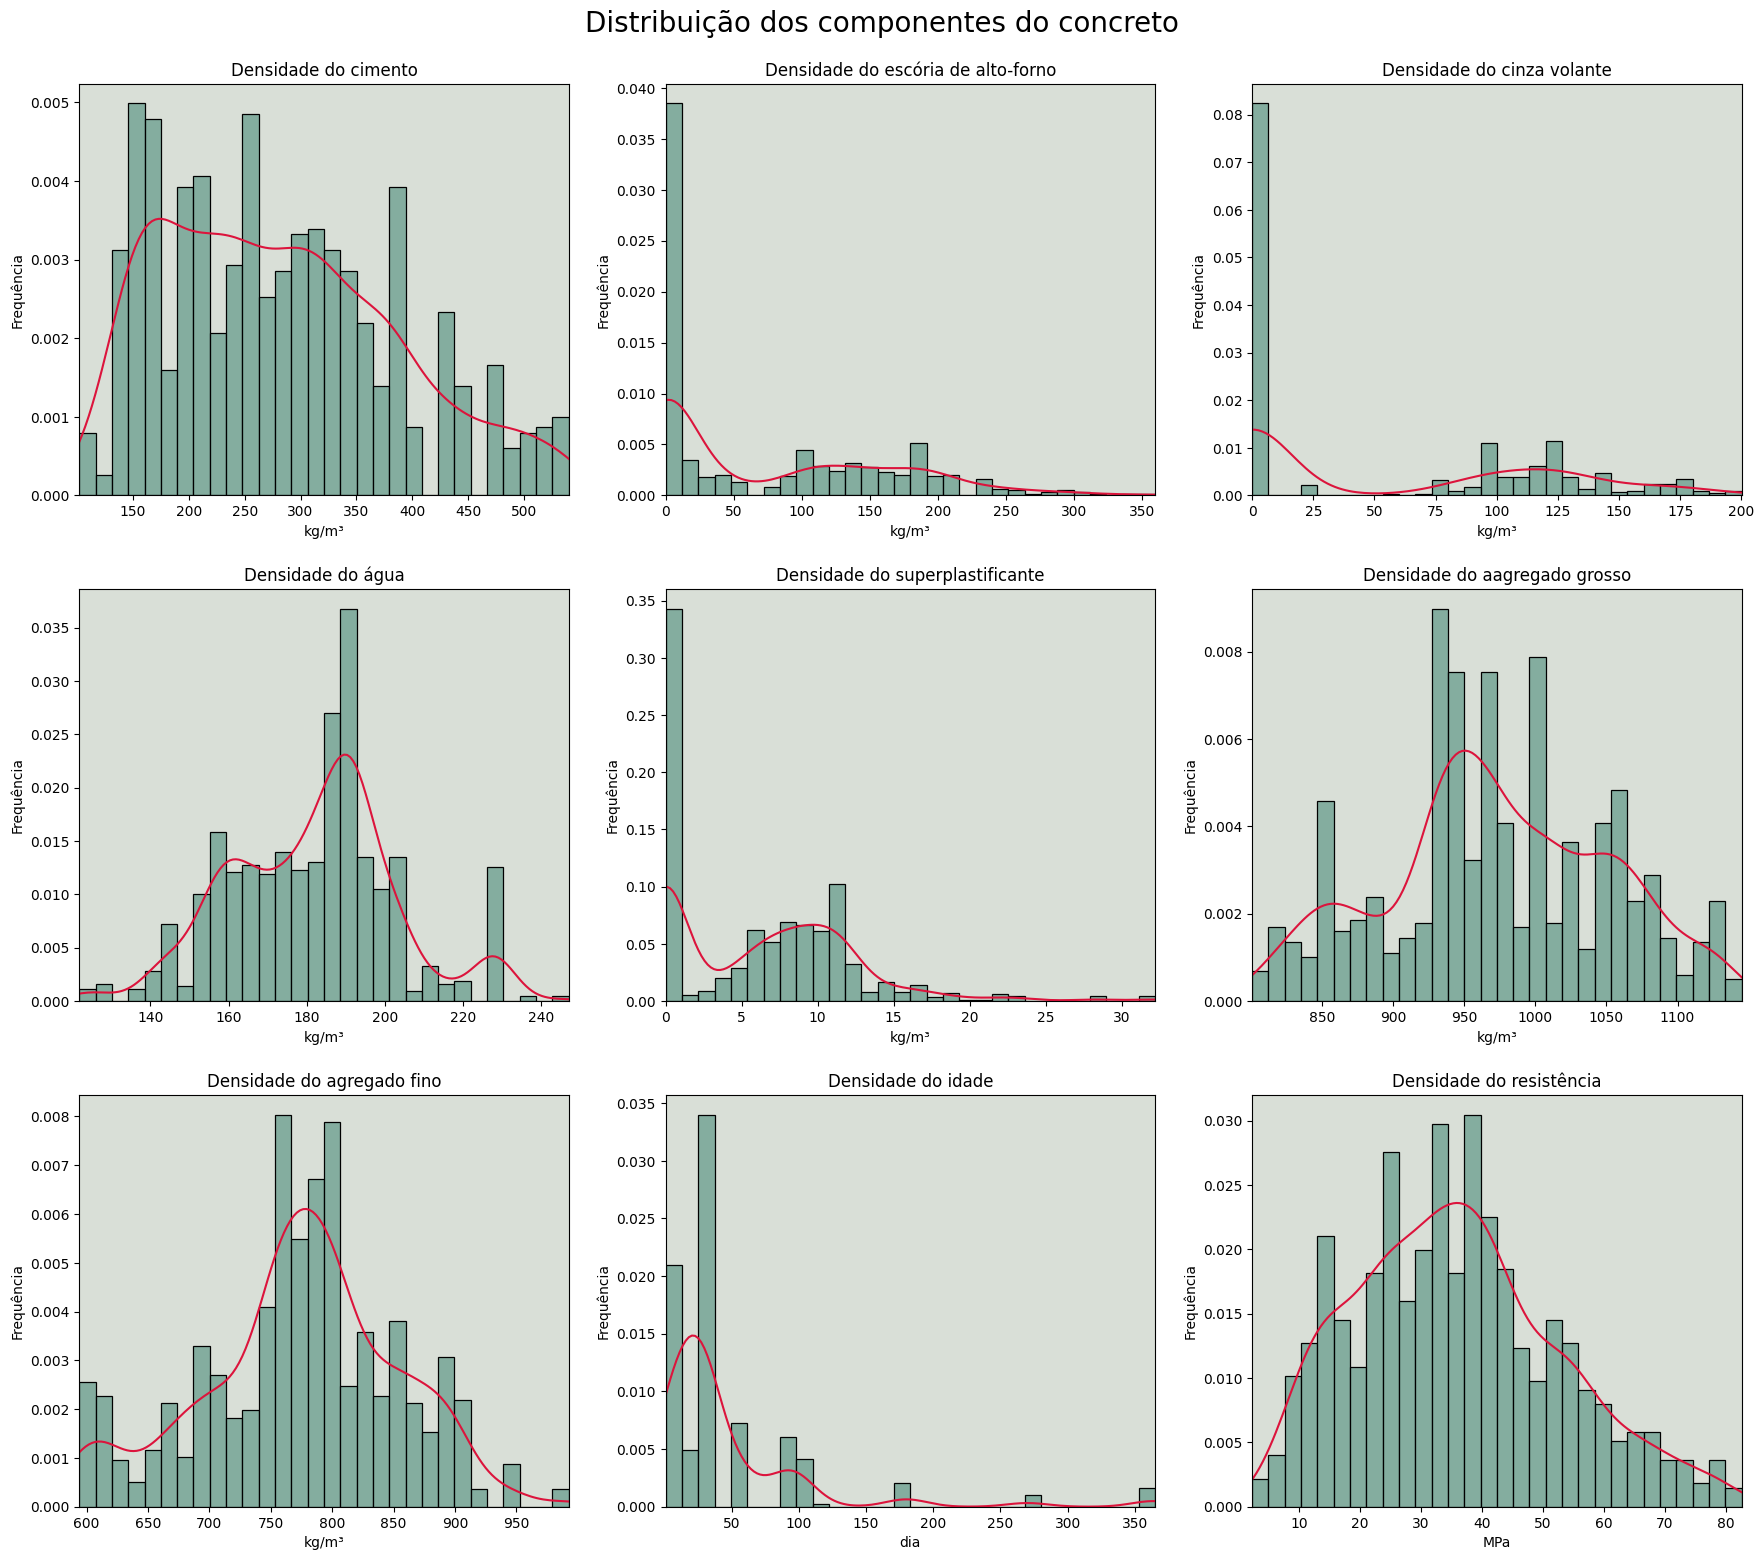

In [29]:
xlabels = ["kg/m³", "kg/m³", "kg/m³", "kg/m³", "kg/m³", "kg/m³", "kg/m³", "dia", "MPa"]
titles = ["Densidade do cimento",
          "Densidade do escória de alto-forno",
          "Densidade do cinza volante",
          "Densidade do água",
          "Densidade do superplastificante",
          "Densidade do aagregado grosso",
          "Densidade do agregado fino",
          "Densidade do idade",
          "Densidade do resistência"]

output_path = "img/histograms.png"

plot_histogram(data = df_concrete, columns = column_names, titles = titles, xlabels = xlabels, output_path = output_path)

### Boxplots

In [30]:
def plot_boxplot(
        data: pd.DataFrame,
        columns: list,
        titles: list,
        ylabels: list = ["Valor"],
        output_path: str = None
    ) -> None:
    """
    Cria e salva boxplots para coluna especificada de um DataFrame.

    Parâmetros:
        data (pd.DataFrame): O DataFrame que contém os dados.
        columns (list): nomes de colunas para a qual o boxplot será criado.
        titles (list): títulos correspondentes aos boxplots.
        ylabel (str, opcional): rótulo do eixo y.
        output_path (str, opcional): O caminho completo do arquivo onde a imagem do boxplot será salva.

    Retorna:
        None: não retorna nenhum valor. Salva a imagem dos boxplots em um arquivo.
    """

    plt.figure(figsize=(18, 16))
    for i, column in enumerate(columns):
        plt.subplot(3, 3, i + 1)  # Posição no grid 3x3
        plt.boxplot(data[column].dropna(), vert=True, patch_artist=True, boxprops=dict(facecolor="#689D8D", color="#689D8D"), medianprops=dict(color="crimson"))

        plt.title(titles[i])
        plt.ylabel(ylabels[i])
        plt.xticks([])

        plt.gca().set_facecolor("#D9DFD7")    # Cor de fundo fora do eixo mais clara
    plt.suptitle("Análise dos componentes do concreto", fontsize=20)
    plt.subplots_adjust(hspace=0.5)
    #plt.gcf().patch.set_facecolor("#E6ECE9")  # Cor de fundo cinza esverdeado
    plt.tight_layout(pad=2)

    if output_path:
        plt.savefig(output_path, bbox_inches="tight")

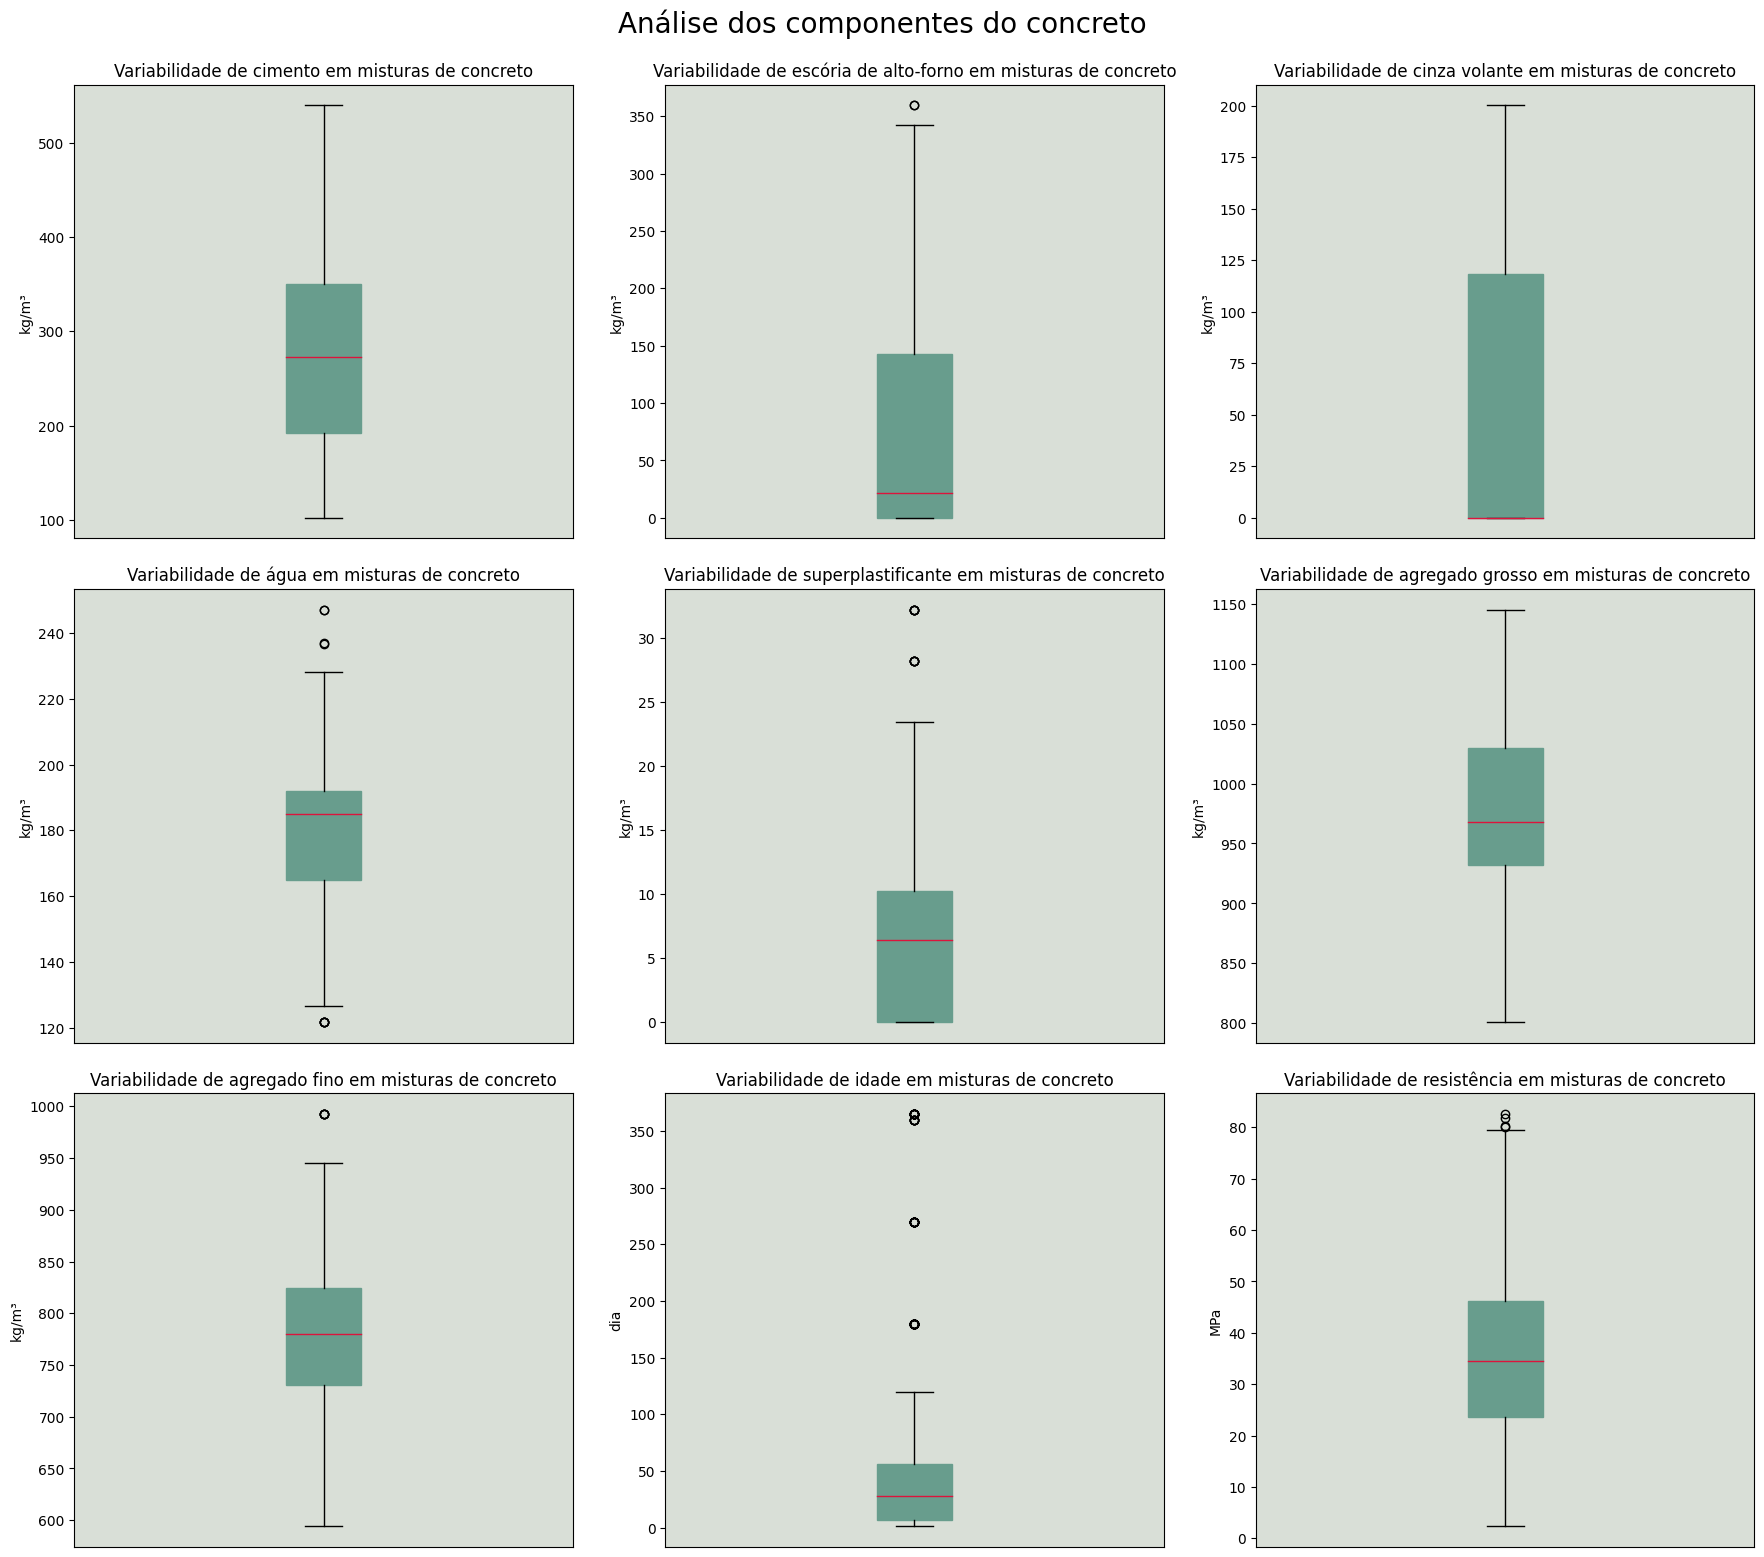

In [31]:
ylabels = ["kg/m³", "kg/m³", "kg/m³", "kg/m³", "kg/m³", "kg/m³", "kg/m³", "dia", "MPa"]
titles = ["Variabilidade de cimento em misturas de concreto",
          "Variabilidade de escória de alto-forno em misturas de concreto",
          "Variabilidade de cinza volante em misturas de concreto",
          "Variabilidade de água em misturas de concreto",
          "Variabilidade de superplastificante em misturas de concreto",
          "Variabilidade de agregado grosso em misturas de concreto",
          "Variabilidade de agregado fino em misturas de concreto",
          "Variabilidade de idade em misturas de concreto",
          "Variabilidade de resistência em misturas de concreto"]

output_path = "img/boxplots.png"

plot_boxplot(data = df_concrete, columns = column_names, titles = titles, ylabels = ylabels, output_path = output_path)

### Gráficos de violino

In [32]:
def plot_violin(
        data: pd.DataFrame,
        columns: list,
        titles: list,
        ylabels: list,
        xlabels: str = "Densidade",
        output_path: str = None
    ) -> None:
    """
    Cria e salva um gráfico de violino de colunas especificadas de um DataFrame.

    Parameters:
        data (pd.DataFrame): O DataFrame que contém os dados.
        columns (list): Os nomes das colunas no DataFrame para as quais o gráfico de violino será plotado.
        titles (list): Os títulos para cada gráfico de violino.
        ylabels (str, opcional): O rótulo do eixo y para cada gráfico.
        xlabels (list): Os rótulos do eixo x para todos os gráficos.
        output_path (str, opcional): O caminho completo do arquivo onde a imagem do gráfico será salva.

    Returns:
        None: Não retorna nenhum valor. Salva o gráfico do violino em um arquivo, se especificado.
    """

    plt.figure(figsize=(18, 16))  # Ajuste o tamanho conforme necessário para acomodar todos os subplots
    for i, column in enumerate(columns):
        plt.subplot(3, 3, i + 1)  # Posição no grid 3x3
        sns.violinplot(data=data, y=column, inner="box", color="#689D8D")

        plt.title(titles[i])
        plt.xlabel(xlabels)
        plt.ylabel(ylabels[i])
        plt.gca().set_facecolor("#D9DFD7")    # Cor de fundo fora do eixo mais clara

    plt.subplots_adjust(hspace=0.3, wspace=0.3)
    plt.suptitle("Análise das distribuições dos componentes do concreto", fontsize=20)
    #plt.gcf().patch.set_facecolor("#E6ECE9")  # Cor de fundo cinza esverdeado
    plt.tight_layout(pad=2)

    if output_path:
        plt.savefig(output_path, bbox_inches="tight")

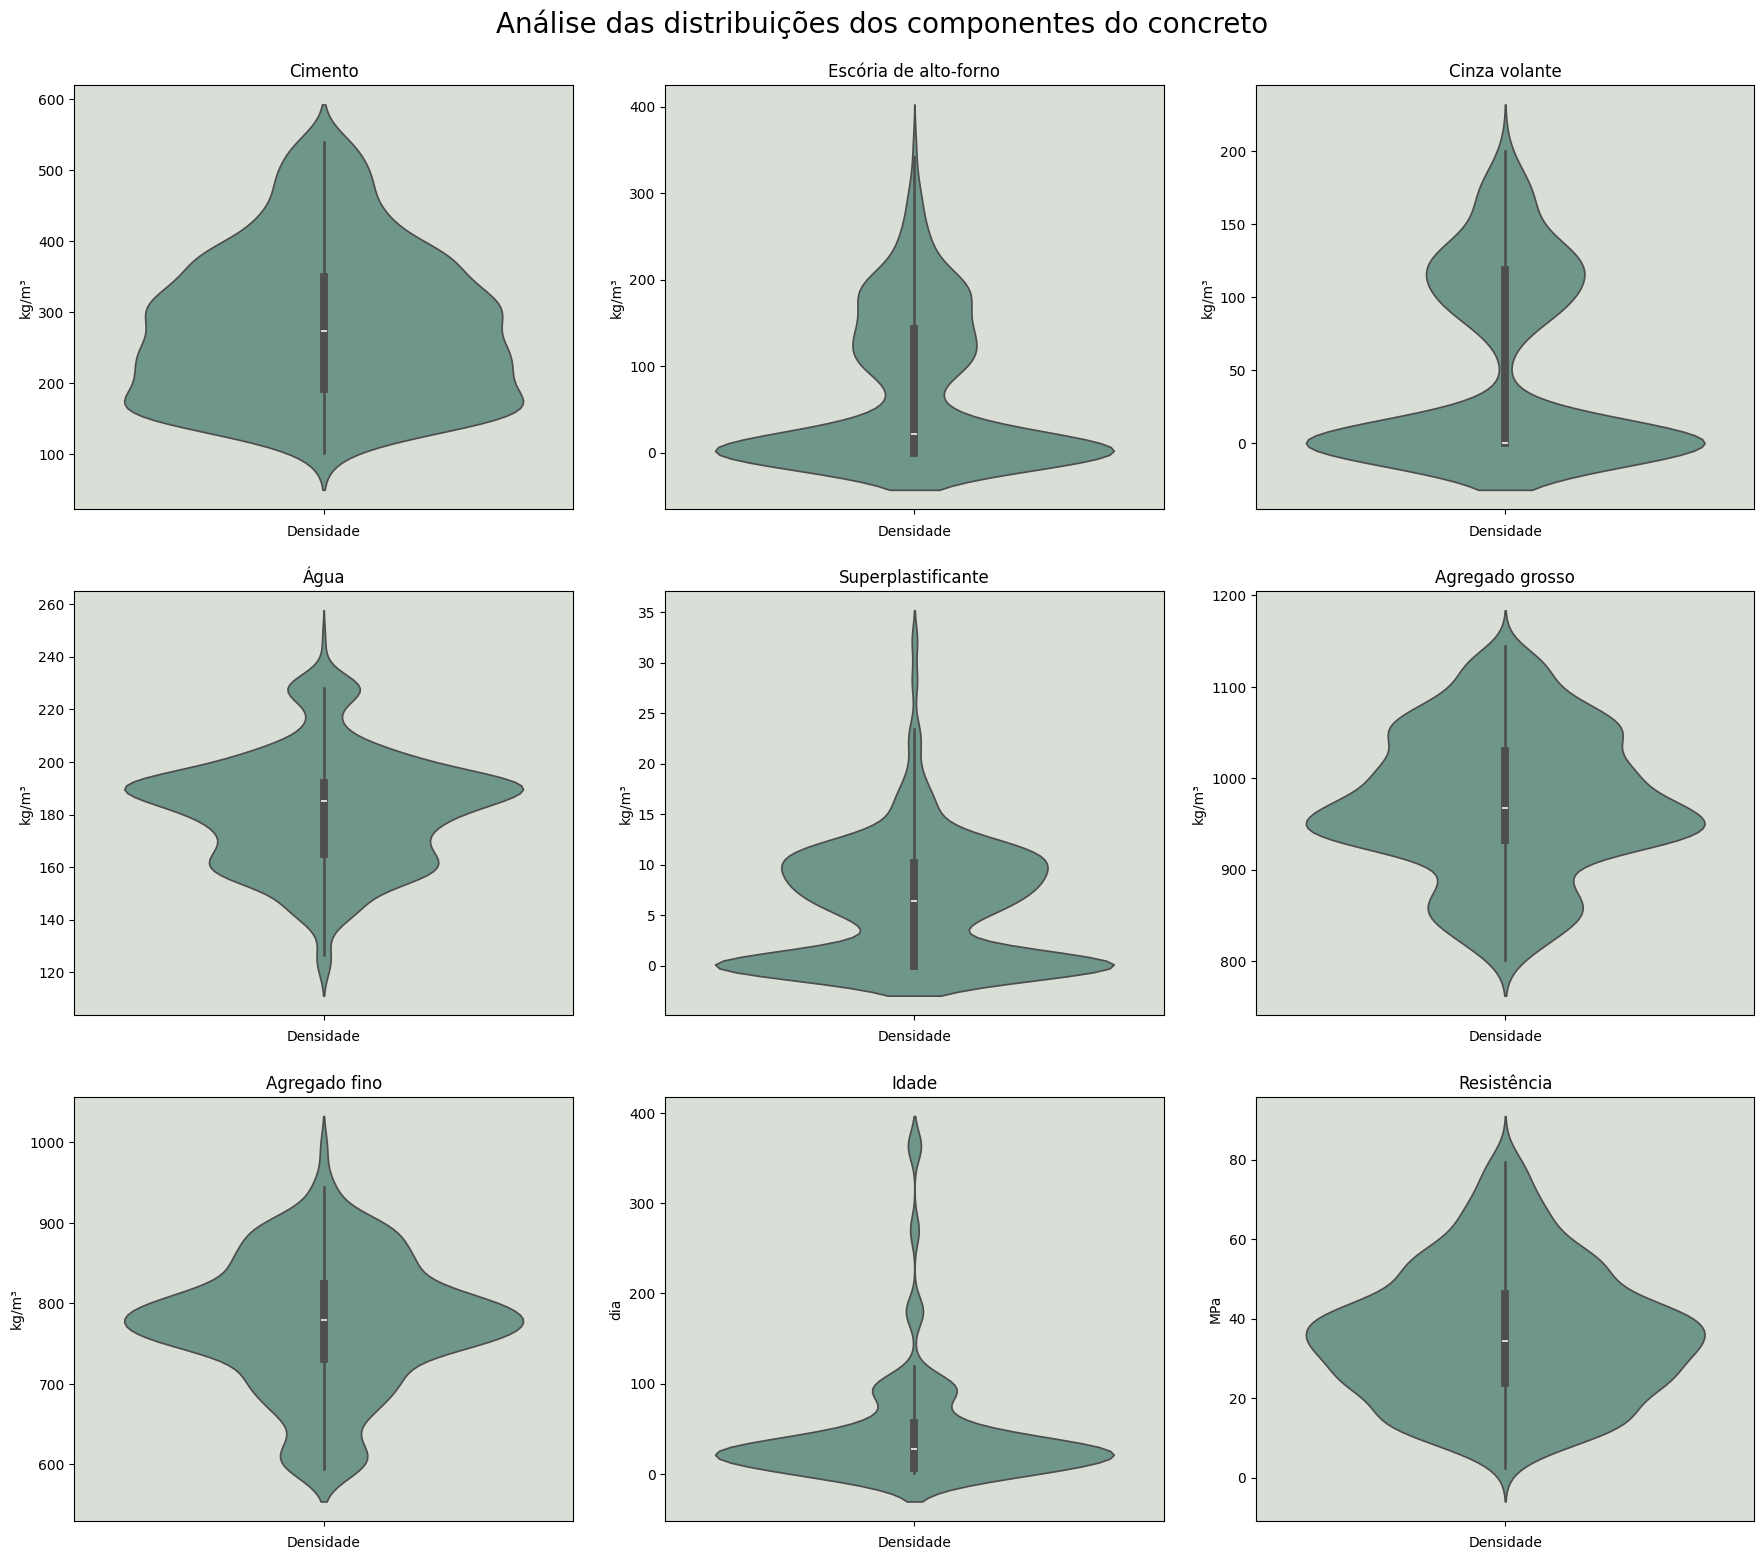

In [33]:
ylabels = ["kg/m³", "kg/m³", "kg/m³", "kg/m³", "kg/m³", "kg/m³", "kg/m³", "dia", "MPa"]
titles = ["Cimento", "Escória de alto-forno", "Cinza volante", "Água", "Superplastificante",
          "Agregado grosso", "Agregado fino", "Idade", "Resistência"]

output_path = "img/violins.png"

plot_violin(data = df_concrete, columns = column_names, titles = titles, ylabels = ylabels, output_path = output_path)

### Gráficos de dispersão

In [34]:
def plot_scatter_matrix(data: pd.DataFrame,
                        input_columns: list,
                        target_column: str,
                        figsize = (10, 20),
                        output_path: str = None
                        ):
    """
    Creates a scatter plot matrix with the target variable and each input variable.

    Parameters:
        data (pd.DataFrame): The DataFrame containing the data.
        input_columns (list): A list of column names for input variables.
        target_column (str): The name of the output variable.
        output_path (str, optional): The full file path where the correlation matrix image will be saved.

    Returns:
        None: This function plots the scatter plot matrix and does not return any value.
    """

    # Create a figure with specified size
    fig, axes = plt.subplots(4, 2, figsize=figsize)
    axes = axes.ravel()  # Flatten the array of axes

    # Define a list of colors
    colors = ['red', 'blue', 'green', 'purple', 'orange', 'brown', 'pink', 'gray', 'olive']

    xlabels = ["kg/m³", "kg/m³", "kg/m³", "kg/m³", "kg/m³", "kg/m³", "kg/m³", "dia", "MPa"]

    for idx, input_column in enumerate(input_columns):
        axes[idx].scatter(data[input_column], data[target_column], alpha=0.4,s=50, color=colors[idx % len(colors)])
        axes[idx].set_xlabel(f"{input_column} ({xlabels[idx]})")
        axes[idx].set_ylabel(f"{target_column} (MPa)")
        axes[idx].set_facecolor("#D9DFD7")

        # Fit and plot regression line
        x = data[input_column].values
        y = data[target_column].values
        coef, b = np.polyfit(x, y, 1)  # Perform linear regression
        axes[idx].plot(x, coef * x + b, color="black")  # Plot the regression line

    # Create an regression line object
    regression_line = mlines.Line2D([], [], color="black", label="Linha de regressão")

    # Add a general title, a legend, adjust layout to make room for the suptitle, general background color
    plt.suptitle(f"Relação entre resistência do concreto e seus componente")
    plt.figlegend(handles = [regression_line], loc="upper right", bbox_to_anchor=(0.95, 0.96))
    plt.subplots_adjust(hspace=0.25, wspace=0.25)
    #plt.gcf().patch.set_facecolor("#D9DFD7")
    plt.tight_layout(rect=[0, 0.03, 1, 0.96])

    plt.show()

    if output_path:
        plt.savefig(output_path, bbox_inches="tight")

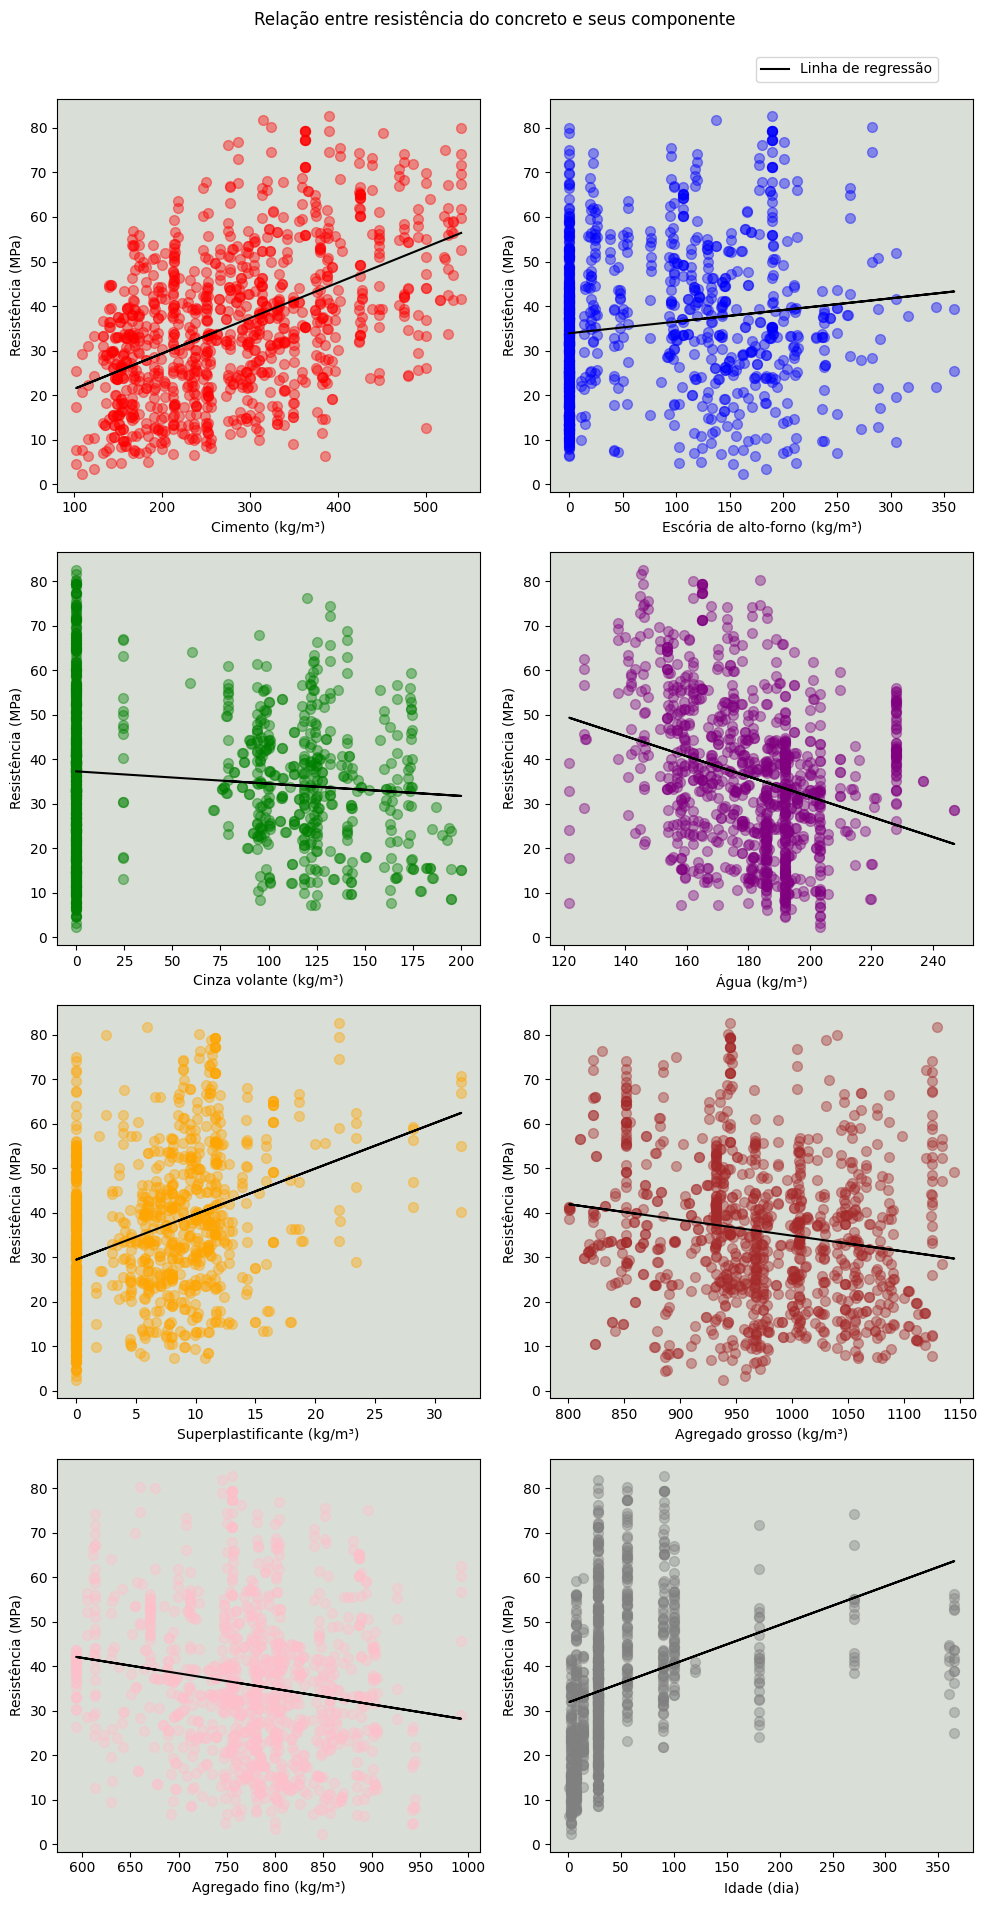

In [35]:
input_columns = column_names[:-1]
plot_scatter_matrix(data = df_concrete, input_columns = input_columns, target_column = "Resistência", output_path = "img/scatter_matrix.png")

### Matriz de correlação

In [36]:
def plot_correlation_matrix(
        data: pd.DataFrame,
        columns: list,
        title: str,
        output_path: str = None
    ) -> None:
    """
    Calculates the Pearson correlation coefficient matrix for the dataframe and generates a heatmap.

    Parameters:
        data (pd.DataFrame): The dataframe for which to calculate the correlation matrix.
        columns (list): List of columns for which to calculate the correlation matrix.
        title (str): The title for the heatmap.
        output_path (str, optional): The full file path where the correlation matrix image will be saved.

    Returns:
        None: This function does not return any value. It saves the heatmap plot to a file and/or displays it.
    """
    # Calculate the correlation matrix
    corr_matrix = data[columns].corr()

    # Dynamic adjustment of image size based on the number of columns
    img_height = 10
    img_width = 8

    # Dynamic font size adjustments based on image size
    title_fontsize = img_width * 1.8

    # Plotting the correlation matrix
    plt.figure(figsize=(img_height, img_width))
    ax = plt.subplot()
    sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5, ax=ax)
    ax.set_title(title)
    ax.set_facecolor("#D9DFD7")
    #plt.gcf().patch.set_facecolor("#E6ECE9")
    sns.set(font_scale=1.2)
    plt.title(title, fontsize=title_fontsize)
    plt.xticks(fontsize=12, rotation=45, ha="right")
    plt.yticks(fontsize=12)

    if output_path:
        plt.savefig(output_path, bbox_inches="tight", dpi=300)

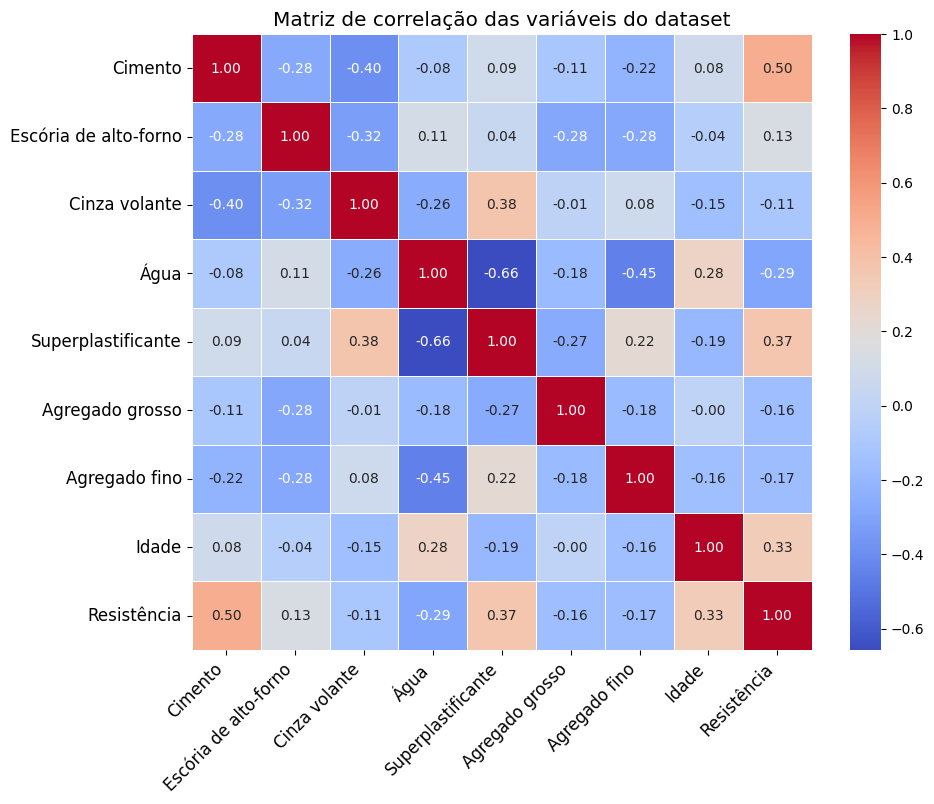

In [37]:
plot_correlation_matrix(data = df_concrete, columns = column_names, title = "Matriz de correlação das variáveis do dataset", output_path = "img/correlation_matrix.png")

## Modelagem Estatística

### Conjunto de treinamento e teste

Agora, separamos o conjunto de dados em uma matriz de variáveis independentes e um vetor de variáveis dependentes. Além disso, dividimos os registros em subconjuntos de treino e teste.

In [ ]:
# column_names[-1] => Resistência
X = df_concrete[column_names[:-1]]
y = df_concrete[column_names[-1]]

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Dimensões dos conjuntos para confirmar
print("Treinamento:", x_train.shape, y_train.shape)
print("Teste:", x_test.shape, y_test.shape)

Treinamento: (824, 8) (824,)
Teste: (206, 8) (206,)


### Regressão Linear Multivariada

Testando combinações diferentes de variáveis de predição

In [38]:
def backward_elimination(data: pd.DataFrame, target: pd.Series, significance_level: float = 0.05) -> [list, pd.DataFrame]:
    """
    Realiza eliminação para trás em um conjunto de dados para seleção de variáveis
    usando o p-valor como critério de corte.

    Args:
        data (pd.DataFrame): DataFrame contendo as variáveis independentes.
        target (pd.Series): Série contendo a variável dependente.
        significance_level (float): O nível de significância para manter uma variável no modelo.

    Returns:
        models (list): Lista contendo os modelos ajustados em cada passo.
        metrics_df (pd.DataFrame): DataFrame contendo as métricas R², AIC, RMSE, resíduo total,
                                   número de variáveis preditoras e os nomes dessas variáveis para cada modelo.
    """
    models = []
    features = data.columns.tolist()
    metrics = []

    while len(features) > 0:
        # Adiciona constante para intercepto
        features_with_constant = sm.add_constant(data[features])
        model = sm.OLS(target, features_with_constant).fit()
        models.append(model)

        # Calcula e salva métricas
        rmse = np.sqrt(mean_squared_error(target, model.predict(features_with_constant)))
        residuals_sum = np.sum(model.resid ** 2)
        metrics.append({
            "R²": model.rsquared,
            "AIC": model.aic,
            "RMSE": rmse,
            "Soma do resíduo": residuals_sum,
            "Num de preditores": len(features),
            "Variáveis preditoras": features.copy()
        })

        # Obtém o p-valor máximo e remove a feature com p-valor mais alto se maior que o nível de significância
        p_values = model.pvalues.iloc[1:]  # ignora o p-valor do intercepto
        max_p_value = p_values.max()
        if max_p_value > significance_level:
            excluded_feature = p_values.idxmax()
            features.remove(excluded_feature)
        else:
            break

    # Cria DataFrame das métricas para facilitar a visualização e análise posterior
    metrics_df = pd.DataFrame(metrics)

    return models, metrics_df

In [ ]:
models, metrics_df = backward_elimination(x_train, y_train)

In [ ]:
# Exibir todas as colunas
pd.set_option('display.max_columns', None)
# Não truncar o conteúdo das colunas
pd.set_option('display.max_colwidth', None)

print(metrics_df)

         R²          AIC       RMSE  Soma do resíduo  Num de preditores  \
0  0.610524  6234.423209  10.518787     91171.386884                  8   
1  0.609112  6235.404678  10.537835     91501.868738                  7   
2  0.608545  6234.598492  10.545471     91634.533011                  6   

                                                                                               Variáveis preditoras  
0  [Cimento, Escória de alto-forno, Cinza volante, Água, Superplastificante, Agregado grosso, Agregado fino, Idade]  
1                   [Cimento, Escória de alto-forno, Cinza volante, Água, Superplastificante, Agregado fino, Idade]  
2                                  [Cimento, Escória de alto-forno, Cinza volante, Água, Superplastificante, Idade]  


#### Métricas dos modelos

In [ ]:
# Printar o summary de cada modelo
for i, model in enumerate(models):
    print(f"Modelo {i+1}:")
    print(model.summary())

Modelo 1:
                            OLS Regression Results                            
Dep. Variable:            Resistência   R-squared:                       0.611
Model:                            OLS   Adj. R-squared:                  0.607
Method:                 Least Squares   F-statistic:                     159.7
Date:                Sun, 16 Jun 2024   Prob (F-statistic):          3.46e-161
Time:                        19:42:45   Log-Likelihood:                -3108.2
No. Observations:                 824   AIC:                             6234.
Df Residuals:                     815   BIC:                             6277.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const               

#### Explicando o output para o modelo 1, o melhor

1. **Dep. Variable**: Variável dependente, ou a variável que o modelo está tentando prever. Aqui, é "Resistência".

2. **R-squared (R²)**: O coeficiente de determinação. Mede a proporção da variância total da variável dependente que é explicada pelas variáveis independentes no modelo. Neste caso, $0.611$ significa que $61.1\%$ da variância na Resistência pode ser explicada pelo modelo.

3. **Adj. R-squared (R² ajustado)**: Uma versão ajustada do R$^2$ que leva em conta o número de variáveis explicativas no modelo. É útil para comparar modelos com diferentes números de preditores. Aqui, $0.607$.

4. **F-statistic**: Uma medida que testa se ao menos uma das variáveis explicativas é estatisticamente significativa. O valor de $159.7$ é bastante alto, o que geralmente indica boa evidência contra a hipótese nula (nenhuma das variáveis explicativas é relevante).

5. **Prob (F-statistic)**: A probabilidade de observar tal valor da estatística F se a hipótese nula for verdadeira. Um valor muito pequeno (3.46e-161) rejeita a hipótese nula de que todos os coeficientes de regressão são zero.

6. **Log-Likelihood**: O logaritmo da função de verossimilhança para o modelo final. É um indicador da probabilidade dos dados sob o modelo especificado. Quanto mais alto, melhor, em termos relativos.

7. **Akaike Information Criterion (AIC)**: Critério de Informação de Akaike. Penaliza a complexidade do modelo e recompensa o ajuste do modelo. Um valor menor indica um modelo melhor. Neste exemplo, é $6234$.

8. **Bayesian Information Criterion (BIC)**: Critério de Informação Bayesiano. Similar ao AIC, mas com uma penalidade mais forte por modelos com mais parâmetros.

9. **Df Residuals**: Graus de liberdade dos resíduos, calculados como o número total de observações menos o número de parâmetros estimados.

10. **Df Model**: Número de variáveis independentes no modelo.

Testes de diagnóstico adicionais:

12. **Omnibus/Prob(Omnibus)**: Teste para a normalidade dos resíduos.
13. **Skew**: Medida de assimetria dos resíduos.
14. **Kurtosis**: Mede o pico dos resíduos.
15. **Durbin-Watson**: Teste que avalia a autocorrelação dos resíduos.
16. **Jarque-Bera (JB)/Prob(JB)**: Outro teste de normalidade dos resíduos.
17. **Cond. No.**: Número de condição, que mede a sensibilidade dos resultados do modelo a erros nos dados. Valores muito altos podem indicar problemas de multicolinearidade.

Cada variável independente, incluindo a constante (intercepto), é listada com os seguintes atributos:

18. **coef**: O coeficiente estimado para a variável.
19. **std err**: O erro padrão da estimativa do coeficiente.
20. **t**: O valor t, que é o coeficiente dividido pelo erro padrão.
21. **$P > |t|$**: P-valor para o teste de hipótese de que o coeficiente é diferente de zero. Valores abaixo de 0.05 geralmente são considerados estatisticamente significativos.
2. **$[0.025, 0.975]$**: O intervalo de confiança de $95\%$ para o coeficiente. Se este intervalo não incluir zero, o coeficiente é estatisticamente significativo no nível de 0.05.

#### Inferência no conjunto de teste

Modelo 1:
RMSE: 9.796475901624362


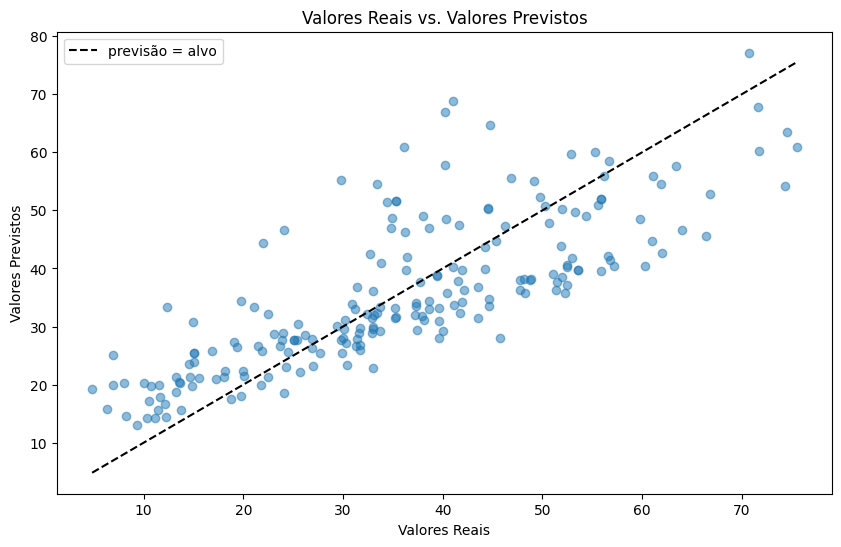

Modelo 2:
RMSE: 9.815172818514911


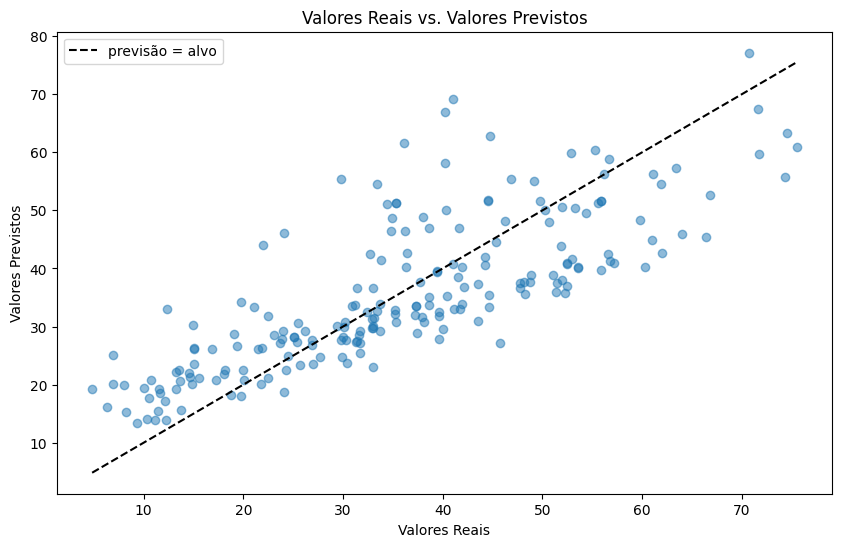

Modelo 3:
RMSE: 9.779688540464095


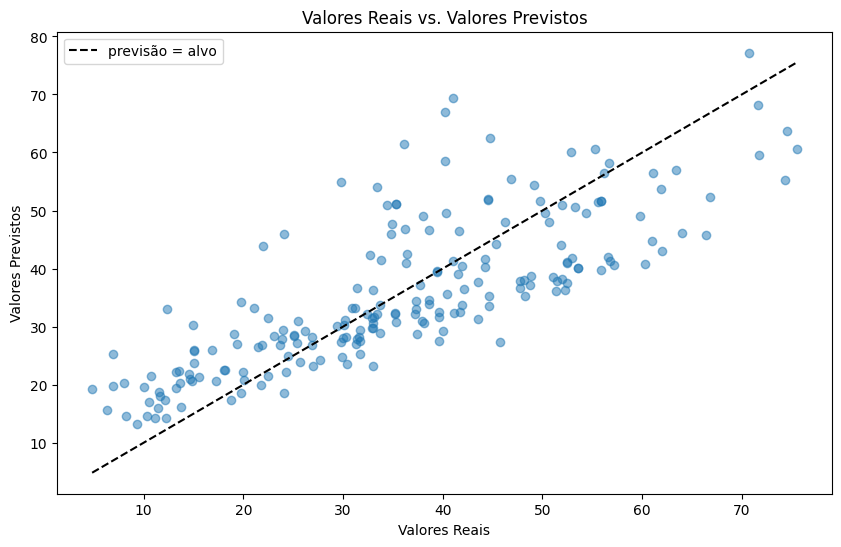

In [ ]:
# Testar o modelo com o conjunto de teste para cada modelo
for i, model in enumerate(models):
    # Submatriz x com as variáveis selecionadas pelo modelo
    final_features = metrics_df.iloc[i]["Variáveis preditoras"]
    x_sub_test_matrix = sm.add_constant(x_test[final_features])

    y_test_pred = model.predict(x_sub_test_matrix)

    # Calcular o erro quadrático médio
    rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

    print(f"Modelo {i+1}:")
    print("RMSE:", rmse)

    # Criando o gráfico
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_test_pred, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], ls="--", c="black", label="previsão = alvo")
    plt.xlabel('Valores Reais')
    plt.ylabel('Valores Previstos')
    plt.title('Valores Reais vs. Valores Previstos')
    plt.legend()
    plt.show()

Parece que, de fato, os modelos erram com maior resíduos registros que têm um elevado valor alvo.

#### Resíduo dos modelos

In [ ]:
def plot_residuals(models: list, output_path: str = None) -> None:
    """
    Plota o histograma, o Q-Q plot dos resíduos e resíduos versus valores ajustados
    para cada modelo em uma lista de modelos.

    Parâmetros:
        models (list): Lista de objetos de resultado de regressão de statsmodels.
    """
    # Criar figura com subplots
    fig, axes = plt.subplots(nrows=len(models), ncols=3, figsize=(12, 4 * len(models)))

    # Se há apenas um modelo, transforma axes em uma matriz 2D para uniformidade no loop
    if len(models) == 1:
        axes = np.array([axes])

    for idx, model in enumerate(models):
        residuals = model.resid

        ### Histograma dos resíduos
        axes[idx, 0].hist(residuals, bins=30, edgecolor="black", alpha=0.7, color="#689D8D")
        axes[idx, 0].set_title(f"Modelo {idx + 1} - Histograma dos Resíduos")
        axes[idx, 0].set_xlabel("Resíduos")
        axes[idx, 0].set_ylabel("Frequência")
        axes[idx, 0].set_facecolor("#D9DFD7")


        ### Q-Q plot dos resíduos
        sm.qqplot(residuals, line="45", fit=True, ax=axes[idx, 1], markerfacecolor="#689D8D", markeredgecolor="#689D8D")
        axes[idx, 1].get_lines()[1].set_color("black")     # Atribuir a cor preta à linha diagonal
        axes[idx, 1].set_title(f"Modelo {idx + 1} - Q-Q Plot dos Resíduos")
        axes[idx, 1].set_xlabel("Quantis Teóricos")
        axes[idx, 1].set_ylabel("Quantis dos Resíduos")
        axes[idx, 1].set_facecolor("#D9DFD7")


        # Calculando os valores ajustados
        fitted_values = model.fittedvalues
        # Obtendo os resíduos do modelo
        residuals = model.resid
        ### Criando o gráfico de resíduos
        axes[idx, 2].scatter(fitted_values, residuals, alpha=0.5, color="#689D8D")
        axes[idx, 2].axhline(0, color="black", lw=2)        # Linha horizontal em y=0 para referência
        axes[idx, 2].set_title(f"Modelo {idx + 1} - Resíduos vs. Valores previstos")
        axes[idx, 2].set_xlabel("Valores previstos")
        axes[idx, 2].set_ylabel("Resíduos")
        axes[idx, 2].set_facecolor("#D9DFD7")

    # Ajustar layout
    plt.tight_layout()
    plt.show()

    if output_path:
        plt.savefig(output_path, bbox_inches="tight", dpi=300)

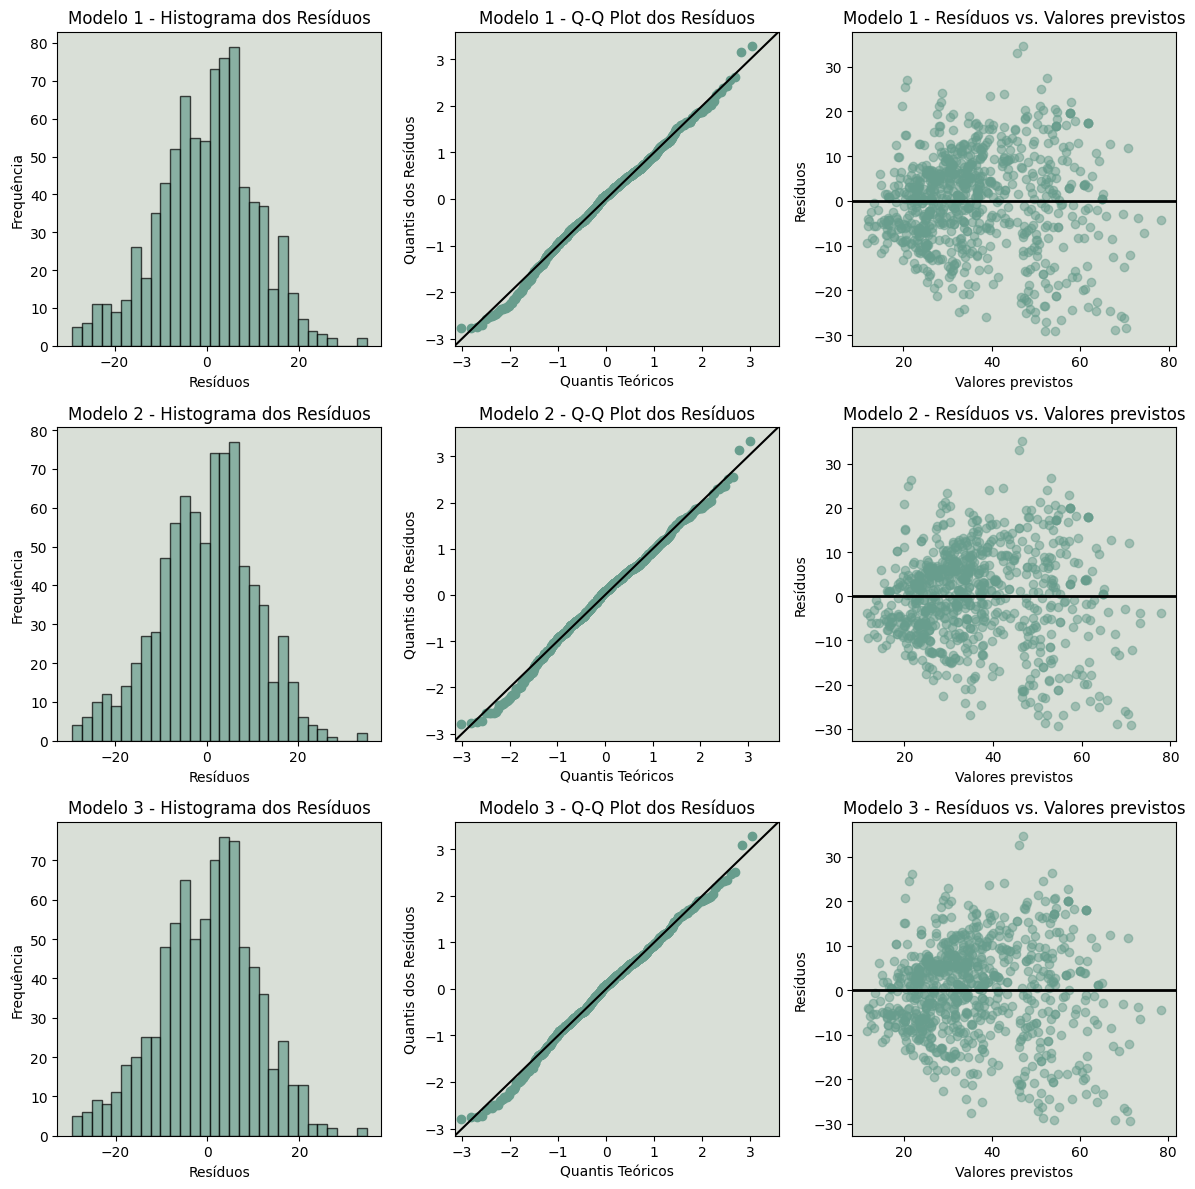

<Figure size 640x480 with 0 Axes>

In [ ]:
plot_residuals(models, output_path = "img/residuals.png")

## Testes com outros modelos

### Modelo de regressão linear generalizado

In [ ]:
# Adicionar uma constante ao conjunto de dados
x_train100 = sm.add_constant(x_train)

# Especificar o modelo
model100 = sm.GLM(y_train, x_train100, family=sm.families.Gaussian())

# Ajustar o modelo
result = model100.fit()

result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:            Resistência   No. Observations:                  824
Model:                            GLM   Df Residuals:                      815
Model Family:                Gaussian   Df Model:                            8
Link Function:               Identity   Scale:                          111.87
Method:                          IRLS   Log-Likelihood:                -3108.2
Date:                Sat, 15 Jun 2024   Deviance:                       91171.
Time:                        21:12:44   Pearson chi2:                 9.12e+04
No. Iterations:                     3   Pseudo R-squ. (CS):             0.7879
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Cimento                   0.1190      0.009     12.682      0.000       0.101       0.137
Escória de alto-forno     0.1085      0.011      9.589      0.000       0.086       0.131
Cinza volante             0.0822      0.014      5.809      0.000       0.054       0.110
Água                     -0.1353      0.044     -3.066      0.002      -0.222      -0.049
Superplastificante        0.3106      0.104      2.978      0.003       0.106       0.515
Agregado grosso           0.0179      0.010      1.719      0.086      -0.003       0.038
Agregado fino             0.0241      0.012      2.034      0.042       0.001       0.047
Idade                     0.1164      0.006     18.120      0.000       0.104       0.129
intercept               -28.8236     29.331     -0.983      0.326     -86.311      28.664
=========================================================================================
"""

### Regressão Polinomial Multivariada

In [ ]:
# Alinhar índices
x_train = x_train.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)

poly = PolynomialFeatures(degree=2, include_bias=False)

# Transformar os dados
x_poly = poly.fit_transform(x_train)

# Converter o resultado para DataFrame para visualização e manipulação mais fácil
x_poly_df = pd.DataFrame(x_poly, columns=poly.get_feature_names_out(x_train.columns))

# Adicionar uma constante ao modelo
x_poly_df = sm.add_constant(x_poly_df)

Melhores variáveis:

In [ ]:
poly_models, poly_metrics_df = backward_elimination(x_poly_df, y_train)

In [ ]:
poly_metrics_df

R²          AIC      RMSE  Soma do resíduo  Num de preditores  \
0  0.813077  5701.518250  7.287124     43756.192604                 45   
1  0.813077  5699.520009  7.287132     43756.286033                 44   
2  0.813074  5697.535131  7.287199     43757.089022                 43   
3  0.813063  5695.582391  7.287408     43759.598752                 42   
4  0.812945  5694.102847  7.289709     43787.246970                 41   
5  0.812804  5692.724075  7.292458     43820.271428                 40   
6  0.812663  5691.342284  7.295194     43853.160062                 39   
7  0.812385  5690.562834  7.300599     43918.165667                 38   
8  0.811756  5691.324780  7.312845     44065.620951                 37   

                                Variáveis preditoras  
0  [const, Cimento, Escória de alto-forno, Cinza ...  
1  [const, Cimento, Escória de alto-forno, Cinza ...  
2  [const, Cimento, Escória de alto-forno, Cinza ...  
3  [const, Cimento, Escória de alto-forno, Cinza ...  
4  [const, Cimento, Escória de alto-forno, Cinza ...  
5  [const, Cimento, Escória de alto-forno, Cinza ...  
6  [const, Cimento, Escória de alto-forno, Cinza ...  
7  [const, Cimento, Escória de alto-forno, Cinza ...  
8  [const, Cimento, Escória de alto-forno, Cinza ...

In [ ]:
# Printar o summary de cada modelo
for i, model in enumerate(poly_models):
    print(f"Modelo {i+1}:")
    print(model.summary())

Modelo 1:
                            OLS Regression Results                            
Dep. Variable:            Resistência   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.803
Method:                 Least Squares   F-statistic:                     77.01
Date:                Fri, 21 Jun 2024   Prob (F-statistic):          2.38e-251
Time:                        14:55:38   Log-Likelihood:                -2805.8
No. Observations:                 824   AIC:                             5702.
Df Residuals:                     779   BIC:                             5914.
Df Model:                          44                                         
Covariance Type:            nonrobust                                         
                                               coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------

Desempenho no conjunto de teste:

In [ ]:
# Alinhar índices
x_test = x_test.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

# Transformar os dados
x_test_poly = poly.fit_transform(x_test)

# Converter o resultado para DataFrame para visualização e manipulação mais fácil
x_test_poly_df = pd.DataFrame(x_test_poly, columns=poly.get_feature_names_out(x_test.columns))

# Adicionar uma constante ao modelo
x_test_poly_df = sm.add_constant(x_test_poly_df)

In [ ]:
rmse_test = []
for i in range(len(poly_models)):
    # Subconjunto do conjunto de treino
    x_test_poly_sub_df = x_test_poly_df[poly_metrics_df.iloc[i]["Variáveis preditoras"]]

    # Usar o melhor modelo para análise no conjunto de teste
    y_test_predict = poly_models[i].predict(sm.add_constant(x_test_poly_sub_df))

    # Calcular o erro quadrático médio
    rmse = np.sqrt(mean_squared_error(y_test, y_test_predict))
    rmse_test.append(rmse)

poly_metrics_df["Soma do resíduo"] = rmse_test
poly_metrics_df.rename(columns={"Soma do resíduo": "RMSE de teste"}, inplace=True)

poly_metrics_df

R²          AIC      RMSE  RMSE de teste  Num de preditores  \
0  0.813077  5701.518250  7.287124       7.455364                 45   
1  0.813077  5699.520009  7.287132       7.454147                 44   
2  0.813074  5697.535131  7.287199       7.456375                 43   
3  0.813063  5695.582391  7.287408       7.456100                 42   
4  0.812945  5694.102847  7.289709       7.482593                 41   
5  0.812804  5692.724075  7.292458       7.537161                 40   
6  0.812663  5691.342284  7.295194       7.558865                 39   
7  0.812385  5690.562834  7.300599       7.539124                 38   
8  0.811756  5691.324780  7.312845       7.518866                 37   

                                Variáveis preditoras  
0  [const, Cimento, Escória de alto-forno, Cinza ...  
1  [const, Cimento, Escória de alto-forno, Cinza ...  
2  [const, Cimento, Escória de alto-forno, Cinza ...  
3  [const, Cimento, Escória de alto-forno, Cinza ...  
4  [const, Cimento, Escória de alto-forno, Cinza ...  
5  [const, Cimento, Escória de alto-forno, Cinza ...  
6  [const, Cimento, Escória de alto-forno, Cinza ...  
7  [const, Cimento, Escória de alto-forno, Cinza ...  
8  [const, Cimento, Escória de alto-forno, Cinza ...

Modelo 1:
RMSE: 7.455364369440348


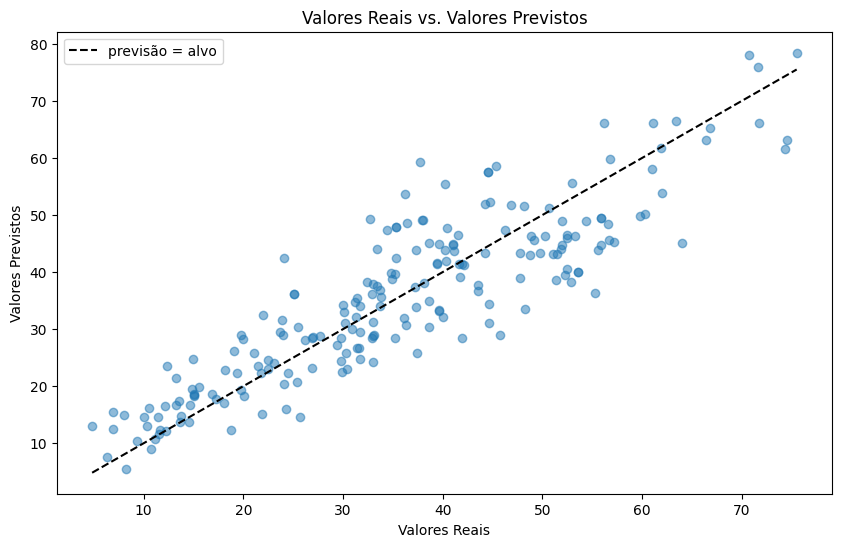

Modelo 2:
RMSE: 7.454147049683884


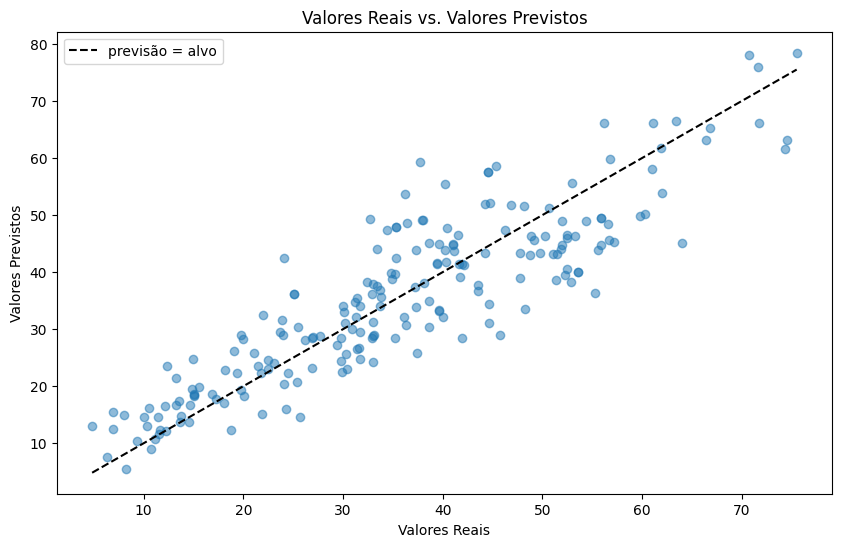

Modelo 3:
RMSE: 7.456374534938545


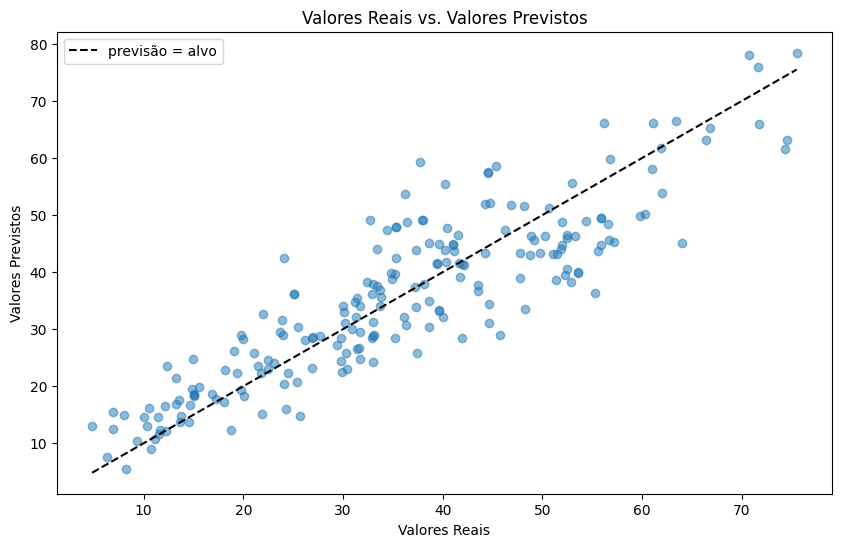

Modelo 4:
RMSE: 7.456099678764598


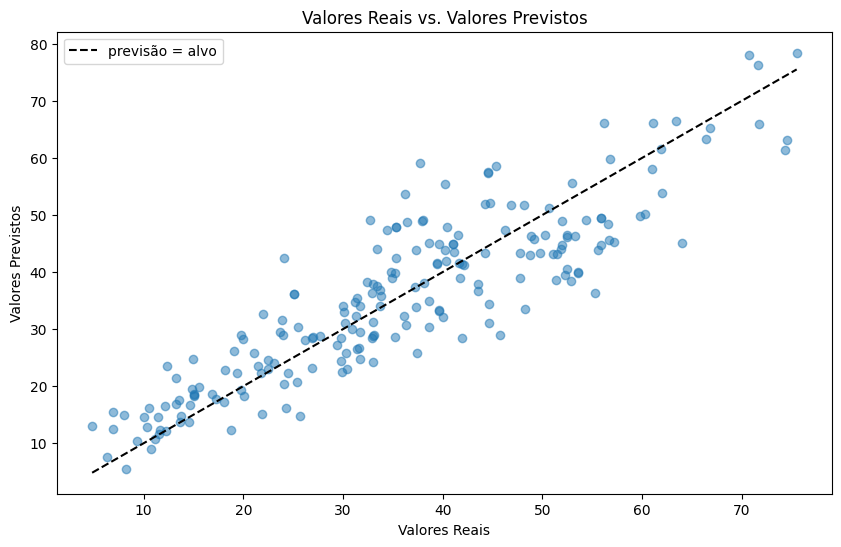

Modelo 5:
RMSE: 7.4825930185890845


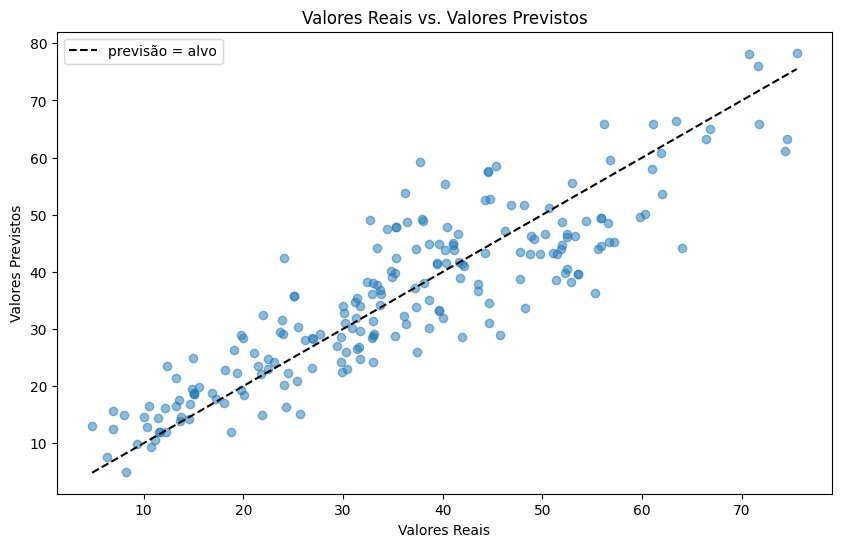

Modelo 6:
RMSE: 7.5371613858820234


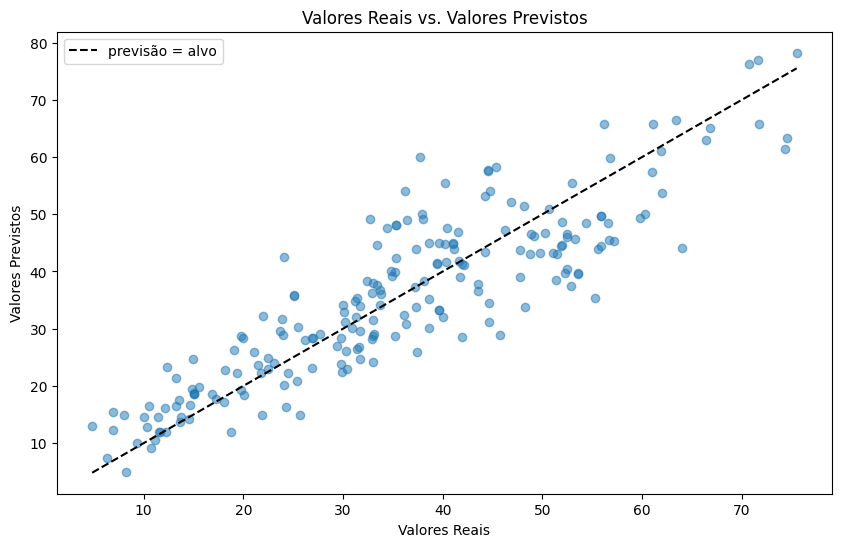

Modelo 7:
RMSE: 7.558865037492788


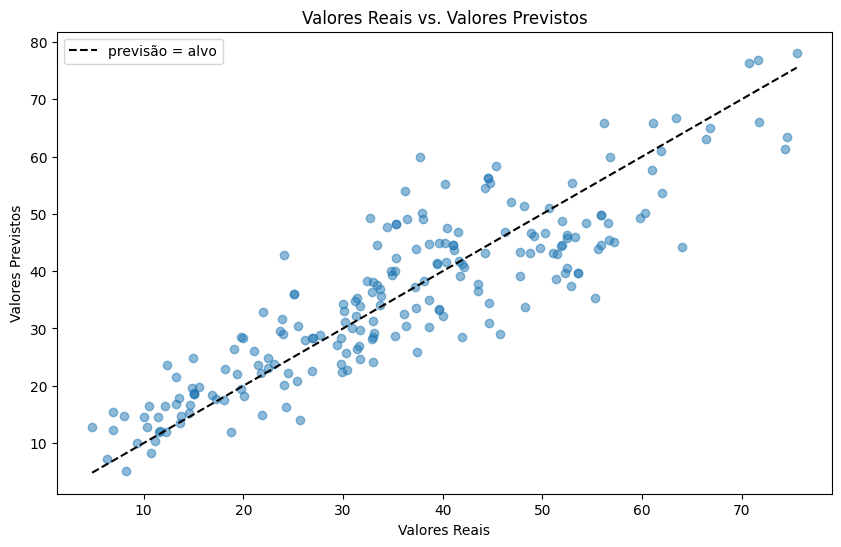

Modelo 8:
RMSE: 7.539123833533605


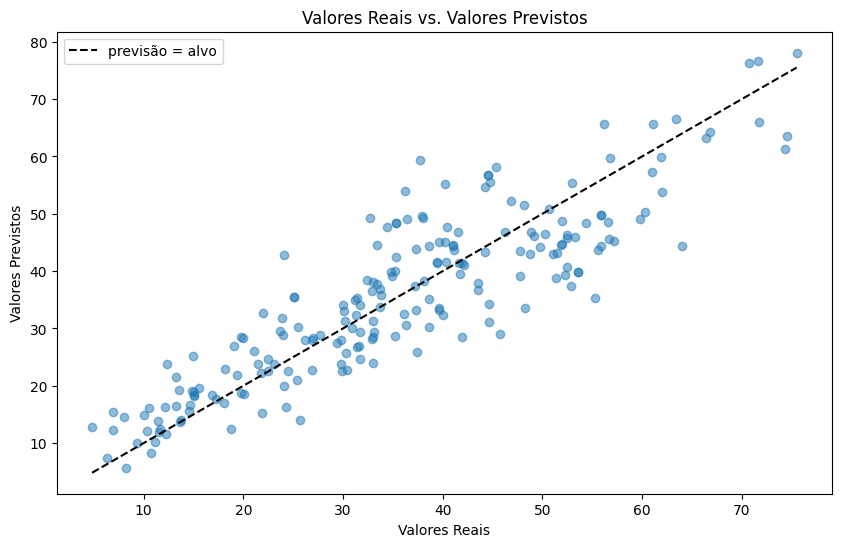

Modelo 9:
RMSE: 7.51886591263989


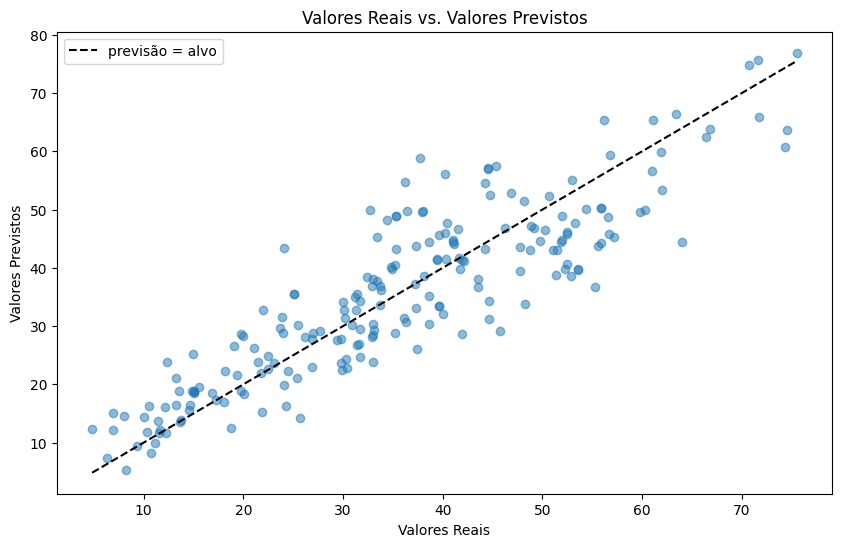

In [ ]:
# Testar o modelo com o conjunto de teste para cada modelo
for i, model in enumerate(poly_models):
    # Submatriz x com as variáveis selecionadas pelo modelo
    final_features = poly_metrics_df.iloc[i]["Variáveis preditoras"]
    x_sub_test_matrix = sm.add_constant(x_test_poly_df[final_features])

    y_test_pred = model.predict(x_sub_test_matrix)

    # Calcular o erro quadrático médio
    rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

    print(f"Modelo {i+1}:")
    print("RMSE:", rmse)

    # Criando o gráfico
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_test_pred, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], ls="--", c="black", label="previsão = alvo")
    plt.xlabel('Valores Reais')
    plt.ylabel('Valores Previstos')
    plt.title('Valores Reais vs. Valores Previstos')
    plt.legend()
    plt.show()

O modelo 1 tem boas métricas de R$^2$, RMSE de treino e teste. Apesar de ter o segundo pior AIC dentre os modelos polinomiais, o seu valor ainda é bem menor do que os obtidos na regressão simples. Por essa razão, parece ser válido escolhê-lo em detrimento de seus semelhantes.

Análise de residuo

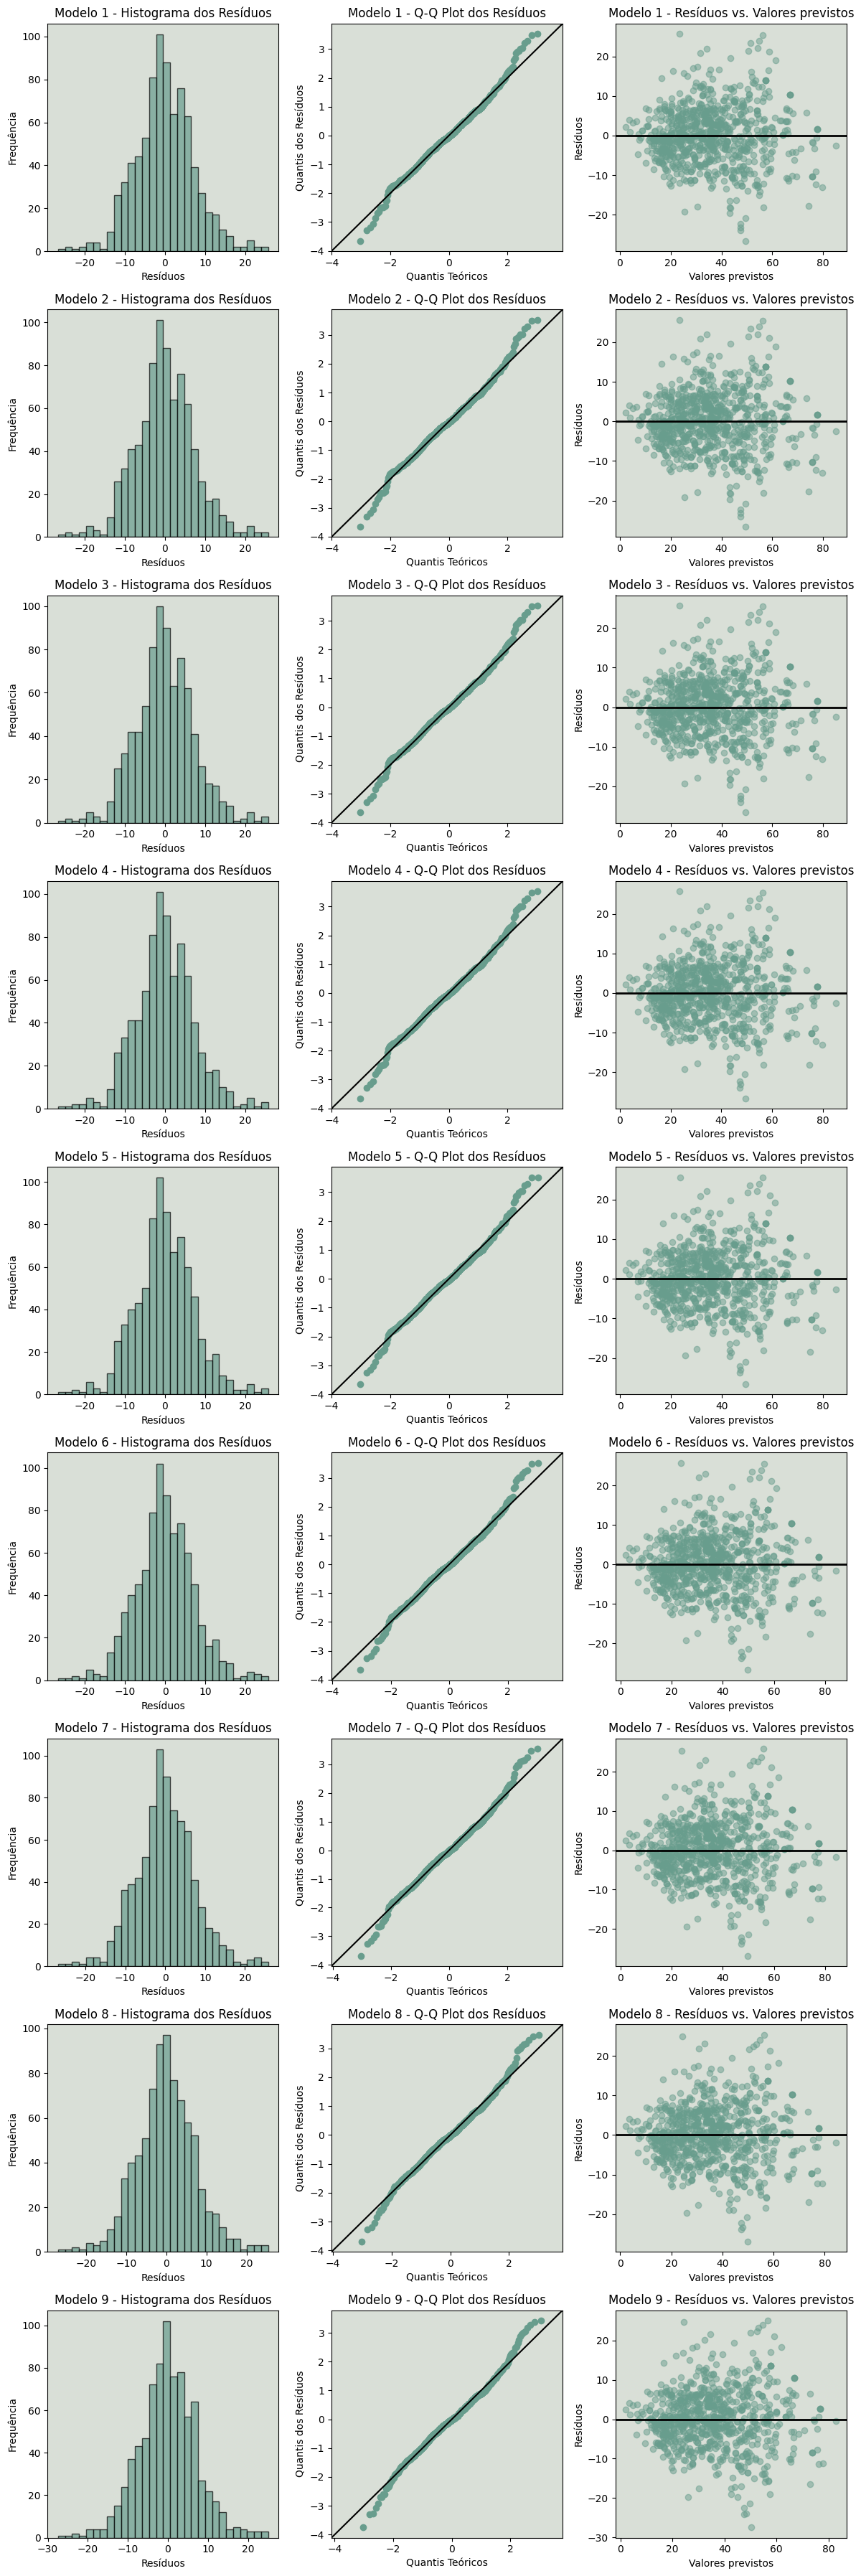

In [ ]:
plot_residuals(poly_models)